<a href="https://colab.research.google.com/github/sanaharora/EDATheoryDA/blob/main/DA_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

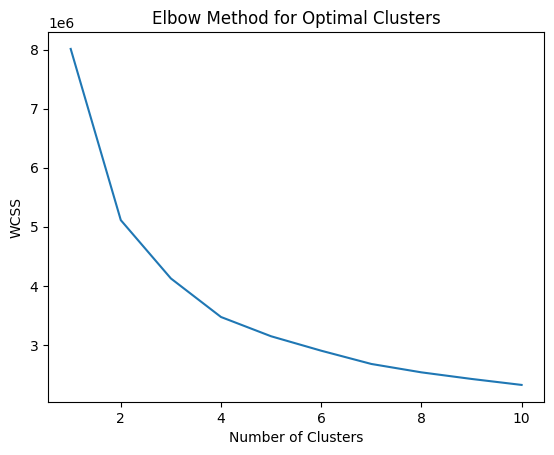

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

# Load the dataset
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/bodyPerformance.csv"
df = pd.read_csv(url)

# Select numeric columns (ignore categorical columns)
numeric_cols = ['height_cm', 'weight_kg', 'body fat_%', 'diastolic', 'systolic']
X = df[numeric_cols]
# Impute missing values using the mean
imputer = SimpleImputer(strategy='mean') # Create an imputer instance
X = imputer.fit_transform(X) # Fit and transform the data


# 1. Find the optimal number of clusters using the elbow method

wcss = []  # List to store WCSS values

# Test for cluster numbers from 1 to 10
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot WCSS vs number of clusters
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Based on the plot, choose the number of clusters where the elbow occurs.
optimal_clusters = 3  # Example, adjust based on your elbow plot

# 2. Fitting KMeans to the dataset with optimal clusters
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Add the cluster label to the original dataframe
df['Cluster'] = y_kmeans



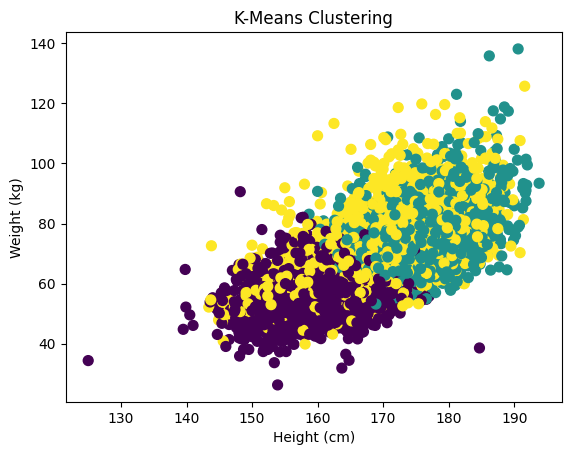

Cluster Centers: 
 [[161.08395006  56.16192054  26.43961713  72.02569807 118.1893076 ]
 [174.57840332  74.43212506  19.57069195  75.24612367 125.94583155]
 [170.03091964  71.62436829  23.62932469  88.5122905  145.62741728]]


In [7]:
# 3. Visualizing the clusters (example using 2D scatter plot for first 2 columns)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

# Print the cluster centers
print("Cluster Centers: \n", kmeans.cluster_centers_)


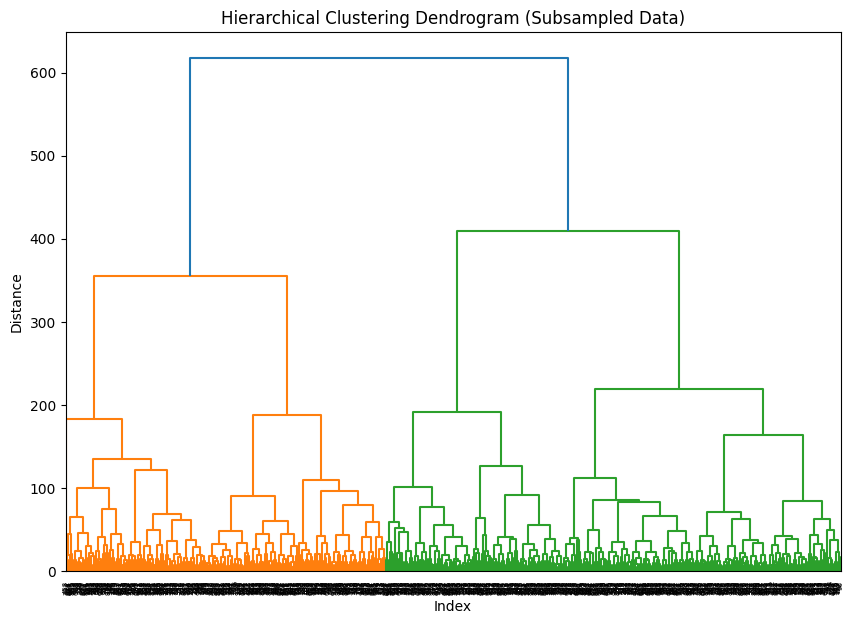

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist

# Load the dataset
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/bodyPerformance.csv"
df = pd.read_csv(url)

# Select numeric columns
numeric_cols = ['height_cm', 'weight_kg', 'body fat_%', 'diastolic', 'systolic']
X = df[numeric_cols]

# Impute missing values with the mean
X = X.fillna(X.mean())

# Subsample the data (e.g., 1000 rows)
X_sample = X.sample(n=1000, random_state=42)

# Compute the condensed distance matrix (using Euclidean distance)
distance_matrix = pdist(X_sample, metric='euclidean')

# Perform hierarchical clustering
linked = linkage(distance_matrix, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Hierarchical Clustering Dendrogram (Subsampled Data)')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()

